### Note for question3
- Please follow the template to complete q3
- You may create new cells to report your results and observations

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## P1. Load data and plot
### TODO
- load q3_data.csv
- plot the points of different labels with different color

(251, 2)


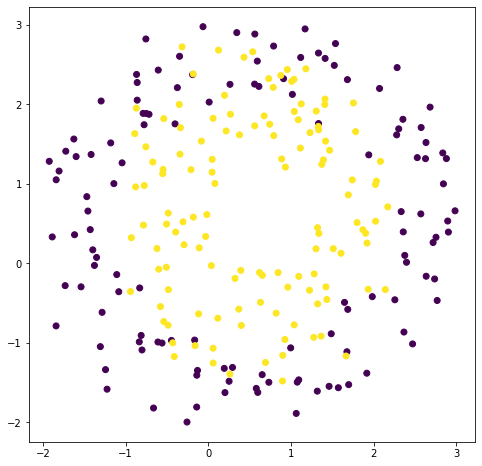

In [2]:
# Load dataset
data = pd.read_csv('q3_data.csv').values
x = np.array(data[:,0:2])
y = np.array(data[:,2])
m = len(x)
# Plot points
x1 = x[:,0]
x2 = x[:,1]
plt.figure(figsize = (8,8))
plt.scatter(x1,x2,c = y)
X = [x1,x2]
print(x.shape)

## P2. Feature mapping
### TODO
- implement function **map_feature()** to transform data from original space to the 28D space specified in the write-up

In [3]:
# Transform points to 28D space
def map_feature(x):
    feature_28 = np.zeros((28,x.shape[0]))
    c = 0
    for i in range(7):
        for j in range(i+1):
            feature_28[c] = x[:,0]**(i-j)*x[:,1]**(j)
            c+=1
    return feature_28

transformed_points = np.transpose(map_feature(x))
# print(transformed_points)
print(transformed_points.shape)

(251, 28)


## P3. Regularized Logistic Regression
### TODO
- implement function **logistic_regpression_regularized()** as required in the write-up
- draw the decision boundary

### Hints
- recycling code from HW2 is allowed
- you may use functions defined this section for part 4 below
- although optional for the report, plotting the convergence curve will be helpful

In [4]:
# Define your functions here
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def calculate_gradients(X, Y, y_pred,weights,alpha=1):
    N = X.shape[0]
    y_pred = np.squeeze(y_pred)
#     print('Ypred',y_pred.shape)
#     print('Y',Y.shape)
#     print('y-ypred',(Y-y_pred).shape)
    # we use y_pred here since it is the sigmoid of X and the weights
    grad = -np.dot(X.T,Y - y_pred)/N

    grad[1:] = (grad[1:]+(alpha*(np.squeeze(weights[1:]))/N))
#     print(grad[1:].shape)
    return grad

def update_weights(prev_weights, current_grads, learning_rate=0.0007):
    
    current_grads = np.reshape(current_grads,(28,1))
    newweights = prev_weights-current_grads*learning_rate
#     print('Prev_W',prev_weights.shape)
#     print('Current_grad',current_grads.shape)
    return newweights
initial_weights = np.zeros((28,1))

def logistic_regression_regularized(X, Y, weights, learning_rate = 0.0007, num_steps = 1000000):
    for i in range(num_steps):
        y_pred = predict(X,weights)
        if i%100000 == 0:
            print(i)
        current_grads = calculate_gradients(X,Y,y_pred,weights,1)
        weights = update_weights(weights,current_grads,learning_rate)
    return(weights)

def predict(X, weights):
#     print('X',X.shape)
#     print('W',weights.shape)
    return sigmoid(np.dot(X, weights))

final_weights = logistic_regression_regularized(transformed_points,y,initial_weights)
# Use the final weights to perform prediction using predict function
Y_predict = predict(transformed_points, final_weights)[:,0]
Y_predict[np.where(Y_predict >= 0.5)] = 1
Y_predict[np.where(Y_predict < 0.5)] = 0 

# print accuracy
count = 0
for i in range(Y_predict.shape[0]):
    count += int(Y_predict[i] == y[i])
print("Accuracy is %0.2f " %((float(count)/Y_predict.shape[0])*100))

print(final_weights)
# print(final_weights.shape)


0
100000
200000
300000
400000
500000
600000
700000
800000
900000
Accuracy is 86.45 
[[ 3.7715844 ]
 [ 0.44440957]
 [ 0.79770065]
 [-0.68243991]
 [-0.40721458]
 [-0.46189794]
 [ 0.28348618]
 [ 0.70479821]
 [ 0.10345402]
 [-0.43959123]
 [-0.93087939]
 [ 0.2542362 ]
 [-0.45825109]
 [-0.34902748]
 [-0.54867786]
 [ 0.90363103]
 [ 0.42493086]
 [ 0.25648605]
 [ 0.15961091]
 [ 0.5475647 ]
 [ 0.46807133]
 [-0.25816845]
 [-0.24843214]
 [-0.11036138]
 [-0.08634723]
 [-0.06772199]
 [-0.15208147]
 [-0.08318928]]


(251, 251)


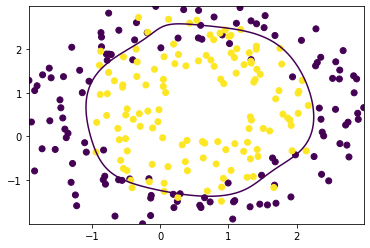

In [5]:
# Plot decision boundary
plt.scatter(x1,x2,c = y)
x_1 = np.linspace(np.min(x1),np.max(x1),251)
x_2 = np.linspace(np.min(x2),np.max(x2),251)
xx1,xx2 = np.meshgrid(x_1,x_2)
f_x1 = np.reshape(xx1,(1,len(x_1)**2))
f_x2 = np.reshape(xx2,(1,len(x_2)**2))
f = np.concatenate((f_x1,f_x2))
# print(f.shape)
g = map_feature(np.transpose(f))
z = np.reshape(np.squeeze((predict(g.T, final_weights))),(251,251))
print(z.shape)
plt.contour(xx1,xx2,z,levels=[0.5])

## P4. Tune the strength of regularization
### TODO
- tweak the hyper-parameter $\lambda$ to be $[0, 1, 100]$
- draw the decision boundaries


0
100000
200000
300000
400000
500000
600000
700000
800000
900000
Accuracy is 88.05 
(251, 251)


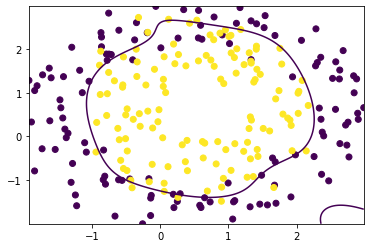

In [6]:
# lambda = 0
alpha0 = 0
def logistic_regression_regularized(X, Y, weights, learning_rate = 0.0007, num_steps = 1000000):
    for i in range(num_steps):
        y_pred = predict(X,weights)
        if i%100000 == 0:
            print(i)
        current_grads = calculate_gradients(X,Y,y_pred,weights,alpha0)
        weights = update_weights(weights,current_grads,learning_rate)
    return(weights)
final_weights = logistic_regression_regularized(transformed_points,y,initial_weights)
Y_predict = predict(transformed_points, final_weights)[:,0]
Y_predict[np.where(Y_predict >= 0.5)] = 1
Y_predict[np.where(Y_predict < 0.5)] = 0 

# print accuracy
count = 0
for i in range(Y_predict.shape[0]):
    count += int(Y_predict[i] == y[i])
print("Accuracy is %0.2f " %((float(count)/Y_predict.shape[0])*100))
plt.scatter(x1,x2,c = y)
x_1 = np.linspace(np.min(x1),np.max(x1),251)
x_2 = np.linspace(np.min(x2),np.max(x2),251)
xx1,xx2 = np.meshgrid(x_1,x_2)
f_x1 = np.reshape(xx1,(1,len(x_1)**2))
f_x2 = np.reshape(xx2,(1,len(x_2)**2))
f = np.concatenate((f_x1,f_x2))
# print(f.shape)
g = map_feature(np.transpose(f))
z = np.reshape(np.squeeze((predict(g.T, final_weights))),(251,251))
print(z.shape)
plt.contour(xx1,xx2,z,levels=[0.5])

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
Accuracy is 86.45 
(251, 251)


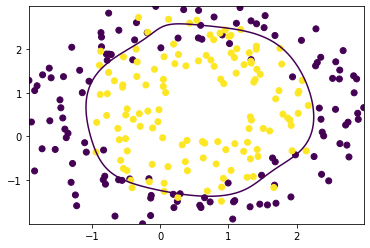

In [7]:
# lambda = 1
alpha1 = 1
def logistic_regression_regularized(X, Y, weights, learning_rate = 0.0007, num_steps = 1000000):
    for i in range(num_steps):
        y_pred = predict(X,weights)
        if i%100000 == 0:
            print(i)
        current_grads = calculate_gradients(X,Y,y_pred,weights,alpha1)
        weights = update_weights(weights,current_grads,learning_rate)
    return(weights)

final_weights = logistic_regression_regularized(transformed_points,y,initial_weights)
Y_predict = predict(transformed_points, final_weights)[:,0]
Y_predict[np.where(Y_predict >= 0.5)] = 1
Y_predict[np.where(Y_predict < 0.5)] = 0 

# print accuracy
count = 0
for i in range(Y_predict.shape[0]):
    count += int(Y_predict[i] == y[i])
print("Accuracy is %0.2f " %((float(count)/Y_predict.shape[0])*100))
plt.scatter(x1,x2,c = y)
x_1 = np.linspace(np.min(x1),np.max(x1),251)
x_2 = np.linspace(np.min(x2),np.max(x2),251)
xx1,xx2 = np.meshgrid(x_1,x_2)
f_x1 = np.reshape(xx1,(1,len(x_1)**2))
f_x2 = np.reshape(xx2,(1,len(x_2)**2))
f = np.concatenate((f_x1,f_x2))
# print(f.shape)
g = map_feature(np.transpose(f))
z = np.reshape(np.squeeze((predict(g.T, final_weights))),(251,251))
print(z.shape)
plt.contour(xx1,xx2,z,levels=[0.5])

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
Accuracy is 84.46 
(251, 251)


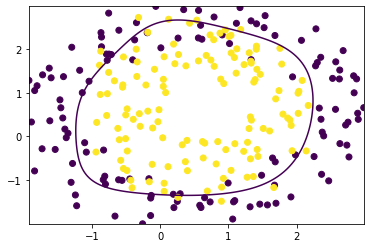

In [8]:
# lambda = 100
alpha100 = 100

def logistic_regression_regularized(X, Y, weights, learning_rate = 0.0007, num_steps = 1000000):
    for i in range(num_steps):
        y_pred = predict(X,weights)
        if i%100000 == 0:
            print(i)
        current_grads = calculate_gradients(X,Y,y_pred,weights,alpha100)
        weights = update_weights(weights,current_grads,learning_rate)
    return(weights)
final_weights = logistic_regression_regularized(transformed_points,y,initial_weights)
Y_predict = predict(transformed_points, final_weights)[:,0]
Y_predict[np.where(Y_predict >= 0.5)] = 1
Y_predict[np.where(Y_predict < 0.5)] = 0 

# print accuracy
count = 0
for i in range(Y_predict.shape[0]):
    count += int(Y_predict[i] == y[i])
print("Accuracy is %0.2f " %((float(count)/Y_predict.shape[0])*100))

plt.scatter(x1,x2,c = y)
x_1 = np.linspace(np.min(x1),np.max(x1),251)
x_2 = np.linspace(np.min(x2),np.max(x2),251)
xx1,xx2 = np.meshgrid(x_1,x_2)
f_x1 = np.reshape(xx1,(1,len(x_1)**2))
f_x2 = np.reshape(xx2,(1,len(x_2)**2))
f = np.concatenate((f_x1,f_x2))
# print(f.shape)
g = map_feature(np.transpose(f))
z = np.reshape(np.squeeze((predict(g.T, final_weights))),(251,251))
print(z.shape)
plt.contour(xx1,xx2,z,levels=[0.5])

Answer for part (d) here: 

As Lambda increases, the decision boundary moves more outwards and seems to be overfitting. In addition it can be seen that the accuracy of the model decreases as the lambda increases.